In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment 

In [57]:
N = 100
tetha = 13
np.random.seed(42)
X = np.random.randint(tetha, 2 * tetha, N)
tetha_estimate = 2 / 3 * (np.sum(X) / N)

In [58]:
a = 0.05

left0 = round(np.max(X) / (1 + (1 - a / 2) ** (1 / N)), 3)
right0 = round(np.max(X) / (1 + (a / 2) ** (1 / N)), 3)
print("Точный интервал: ", "[", left0, ',', right0, ']')
print("Размах = ", round(right0 - left0, 3))

Точный интервал:  [ 12.502 , 12.731 ]
Размах =  0.229


In [59]:
XX = X ** 2
left1 = round(-1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate, 3)
right1 = round(1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate, 3)
print("Асимптотический интервал: [", left1, ', ', right1, ']')
print("Размах = ", round(right1 - left1, 3))

Асимптотический интервал: [ 12.375 ,  13.319 ]
Размах =  0.944


In [60]:
M = np.array([])
for i in range(1000):
    M = np.append(M, 2 / 3 * np.mean(np.random.choice(X, size = len(X))) - 2 / 3 * np.mean(X))

M = np.sort(M)

left2 = round(2 / 3 * np.mean(X) + M[24], 3)
right2 = round(2 / 3 * np.mean(X) + M[974], 3)

print("Бутстраповский интервал: [", left2, ', ', right2, ']')
print("Размах = ", round(right2 - left2, 3))

Бутстраповский интервал: [ 12.353 ,  13.307 ]
Размах =  0.954


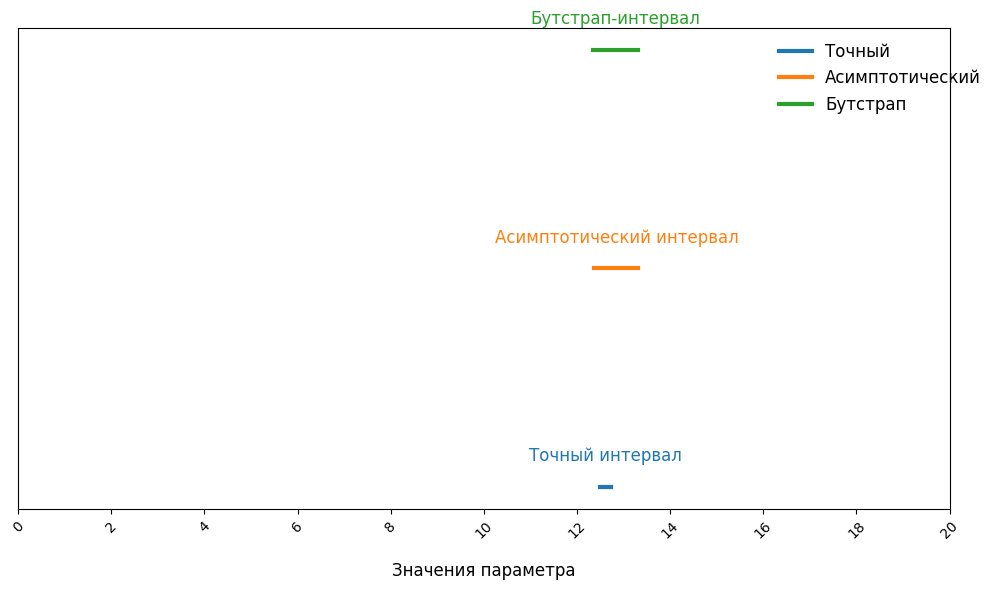

In [61]:
# Генерация данных
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(left0, right0, 100)
y1 = [1] * 100

x2 = np.linspace(left1, right1, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

# Настройка стиля графика
plt.figure(figsize=(10, 6))
plt.xlim(min(left0, left1, left2), max(right0, right1, right2))
# Построение интервалов с разными стилями
plt.plot(x1, y1, 
         color='#1f77b4', 
         linewidth=3, 
         label="Точный")

plt.plot(x2, y2, 
         color='#ff7f0e', 
         linewidth=3, 
         label="Асимптотический")

plt.plot(x3, y3, 
         color='#2ca02c', 
         linewidth=3, 
         label="Бутстрап")

# Настройка осей
plt.xticks(np.arange(0, 21, 2), 
          fontsize=10, 
          rotation=45)
plt.xlabel('Значения параметра', 
          fontsize=12, 
          labelpad=15)

plt.yticks([])
plt.axis('on')

# Добавление текстовых меток
plt.text(np.mean(x1), 1.1, "Точный интервал", 
         ha='center', va='bottom', 
         color='#1f77b4', fontsize=12)

plt.text(np.mean(x2), 2.1, "Асимптотический интервал", 
         ha='center', va='bottom', 
         color='#ff7f0e', fontsize=12)

plt.text(np.mean(x3), 3.1, "Бутстрап-интервал", 
         ha='center', va='bottom', 
         color='#2ca02c', fontsize=12)

# Настройка легенды
plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.05, 1),
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.show()